In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
%aimport -np
%aimport -plt
%aimport -display

from draw_cdpr import plot_trajectory
from draw_controller import draw_controller_anim
from gerry02_traj_tracking import main, plot, save_controller

In [20]:
# cdpr, controller, result, N, dt, pdes = main(Q=np.ones(6)*1e3, R=np.ones(1)*1e-3, debug=False)
# cdpr, controller, result, N, dt, pdes = main(Q=np.ones(6)*1e3, R=np.ones(1)*1e-3, N0=9700, dN=10, debug=False)
# cdpr, controller, result, N, dt, pdes = main(Q=np.ones(6)*1e3, R=np.ones(1)*1e-3, N0=9700, debug=False)
cdpr, controller, result, N, dt, pdes = main(fname='data/ATL.h', Q=np.ones(6)*1e3, R=np.ones(1)*1e-3, dN=1, debug=False)

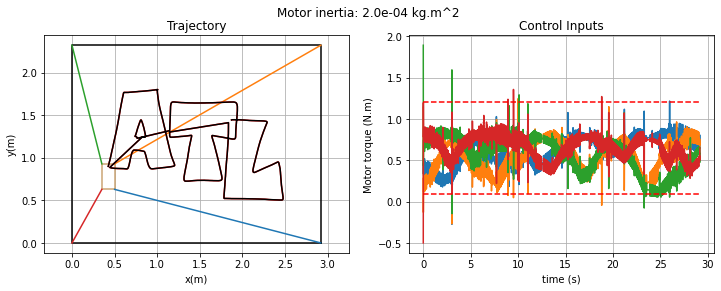

In [21]:
# Plot Trajectory
anim = plot_trajectory(cdpr, result, dt*N, dt, N, pdes, step=10);
plt.suptitle('Motor inertia: {:.1e} kg.m^2'.format(cdpr.params.winch_params.inertia_));

In [6]:
# Animate Trajectory
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 25.0
from IPython.display import HTML
HTML(anim.to_html5_video())

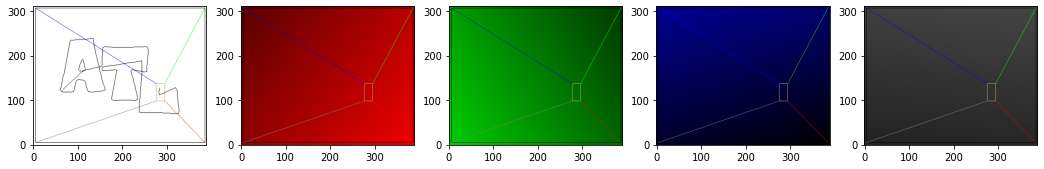

In [7]:
# Plot Controller Gains
anim2 = draw_controller_anim(cdpr, controller, result, N, step=50);

In [8]:
# Animate Controller Gains
from IPython.display import HTML
HTML(anim2.to_html5_video())

In [22]:
save_controller('data/ATL_controller_1e6.h', controller)